<a href="https://colab.research.google.com/github/Vineet2107/EEG_Pipeline/blob/main/DBN_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import pandas as pd
channel_types_tsv = pd.read_csv('/content/drive/MyDrive/eeg/sub-AB10_eeg_sub-AB10_task-gonogo_run-1_channels.tsv', delimiter = '\t')

def get_channel_types_dic(channel_types_tsv):
    channel_types = {}
    for i in range(channel_types_tsv.shape[0]):
        channel_types[channel_types_tsv['name'][i]] = channel_types_tsv['type'][i].lower()
    reassign_dic = {'HEO':'eog', 'VEO':'eog', 'R-Dia-X-(mm)':'misc', 'R-Dia-Y-(mm)':'misc'}
    for k in list(reassign_dic.keys()):
        if k in list(channel_types):
            channel_types[k] = reassign_dic[k]
    return channel_types

channel_types = get_channel_types_dic(channel_types_tsv)
channel_types

{'AF3': 'eeg',
 'AF4': 'eeg',
 'C1': 'eeg',
 'C2': 'eeg',
 'C3': 'eeg',
 'C4': 'eeg',
 'C5': 'eeg',
 'C6': 'eeg',
 'CB1': 'eeg',
 'CB2': 'eeg',
 'CP1': 'eeg',
 'CP2': 'eeg',
 'CP3': 'eeg',
 'CP4': 'eeg',
 'CP5': 'eeg',
 'CP6': 'eeg',
 'CPz': 'eeg',
 'Cz': 'eeg',
 'EKG': 'ecg',
 'F1': 'eeg',
 'F2': 'eeg',
 'F3': 'eeg',
 'F4': 'eeg',
 'F5': 'eeg',
 'F6': 'eeg',
 'F7': 'eeg',
 'F8': 'eeg',
 'FC1': 'eeg',
 'FC2': 'eeg',
 'FC3': 'eeg',
 'FC4': 'eeg',
 'FC5': 'eeg',
 'FC6': 'eeg',
 'FCz': 'eeg',
 'FT7': 'eeg',
 'FT8': 'eeg',
 'Fz': 'eeg',
 'HEO': 'eog',
 'M1': 'eeg',
 'M2': 'eeg',
 'O1': 'eeg',
 'O2': 'eeg',
 'Oz': 'eeg',
 'P1': 'eeg',
 'P2': 'eeg',
 'P3': 'eeg',
 'P4': 'eeg',
 'P5': 'eeg',
 'P6': 'eeg',
 'P7': 'eeg',
 'P8': 'eeg',
 'PO3': 'eeg',
 'PO4': 'eeg',
 'PO5': 'eeg',
 'PO6': 'eeg',
 'PO7': 'eeg',
 'PO8': 'eeg',
 'POz': 'eeg',
 'Pz': 'eeg',
 'R-Dia-X-(mm)': 'misc',
 'R-Dia-Y-(mm)': 'misc',
 'T7': 'eeg',
 'T8': 'eeg',
 'TP7': 'eeg',
 'TP8': 'eeg',
 'VEO': 'eog'}

In [122]:
!pip install mne

In [123]:
!pip install mne_bids

In [124]:
import matplotlib
import pathlib

import mne
print(mne.__version__)
import mne_bids

import numpy as np

0.24.1


In [125]:
raw = mne.io.read_raw_eeglab('/content/drive/MyDrive/eeg/sub-AB10_eeg_sub-AB10_task-gonogo_run-1_eeg.set', eog=(),
                             preload=True, uint16_codec=None, verbose=None)
unclean_raw = raw.copy()

<ipython-input-125-7cd932d306d8>:2: RuntimeWarning: Unknown types found, setting as type EEG:
heog: ['HEO']
pupil: ['R-Dia-X-(mm)', 'R-Dia-Y-(mm)']
veog: ['VEO']
  preload=True, uint16_codec=None, verbose=None)
<ipython-input-125-7cd932d306d8>:2: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['EKG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  preload=True, uint16_codec=None, verbose=None)


In [126]:
raw.set_channel_types(channel_types)
raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: AF3, AF4, F7, F5, F3, F1, Fz, F2, F4, F6, F8, FT7, FC5, FC3, ...
 chs: 61 EEG, 2 EOG, 1 ECG, 2 misc
 custom_ref_applied: False
 dig: 65 items (65 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 66
 projs: []
 sfreq: 500.0 Hz
>

In [127]:
raw.filter(0.5, 50)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 3301 samples (6.602 sec)



<RawEEGLAB | sub-AB10_eeg_sub-AB10_task-gonogo_run-1_eeg.set, 66 x 262640 (525.3 s), ~132.3 MB, data loaded>

In [128]:
ica = mne.preprocessing.ICA(n_components = 21, random_state = 42, max_iter = "auto", method = "fastica")

In [129]:
ica.fit(raw)

Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 21 components
Fitting ICA took 17.6s.


Method,fastica
Fit,55 iterations on raw data (262640 samples)
ICA components,21
Explained variance,98.3 %
Available PCA components,61
Channel types,eeg
ICA components marked for exclusion,—


Creating RawArray with float64 data, n_channels=24, n_times=262640
    Range : 0 ... 262639 =      0.000 ...   525.278 secs
Ready.


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


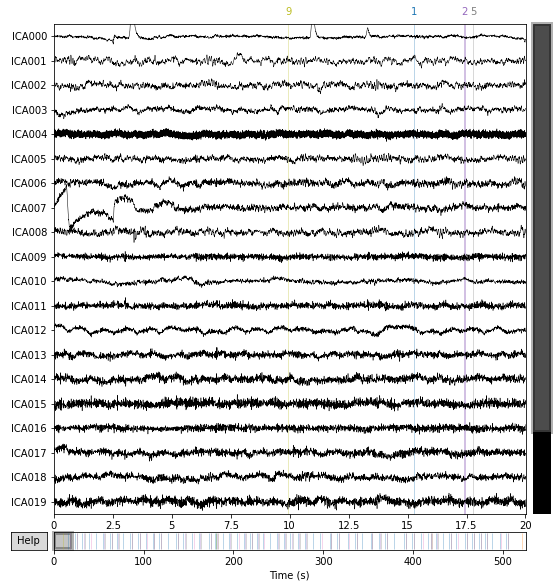

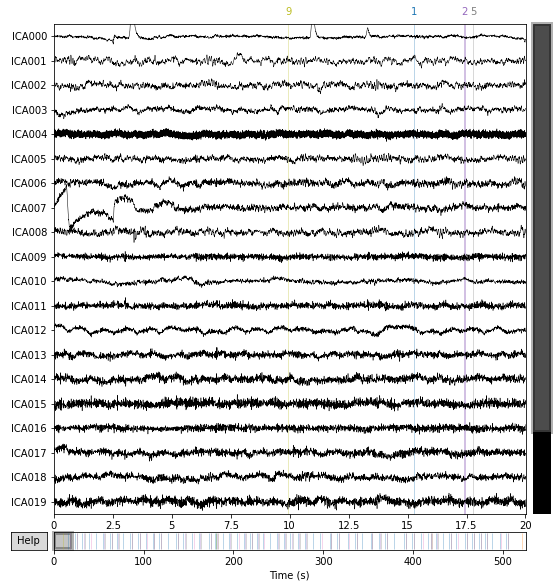

In [130]:
ica.plot_sources(raw)

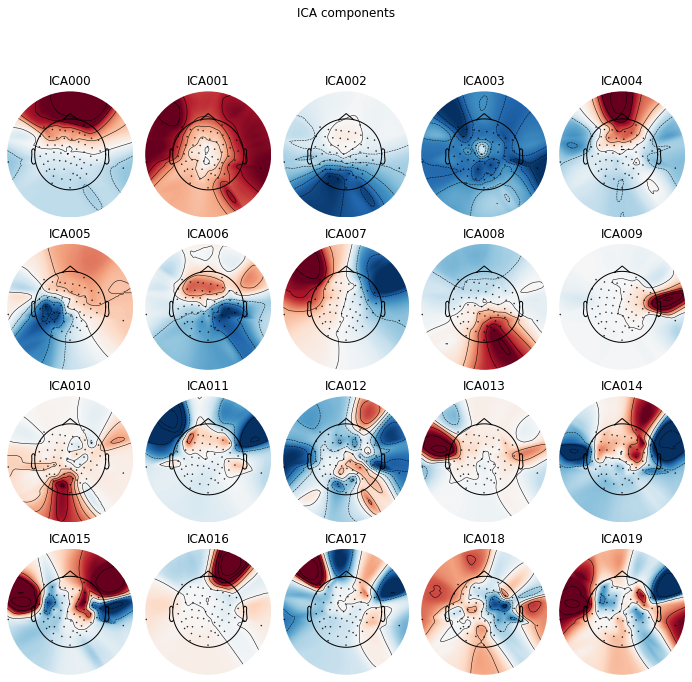

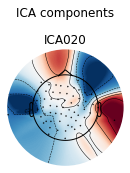

[<MNEFigure size 702x696.24 with 20 Axes>,
 <MNEFigure size 140.4x187.56 with 1 Axes>]

In [131]:
ica.plot_components(outlines = 'head', sphere = 10, ch_type = 'eeg')

In [132]:
#To find and mark bad components
def mark_artifacts(ica, raw):
    ica.exclude = []
    ica.detect_artifacts(raw)
    eeg_bads = list(ica.exclude)
    ecg_bads = ica.find_bads_ecg(raw)[0]
    eog_bads = ica.find_bads_eog(raw)[0]
    ica.exclude = list(set(eeg_bads+ecg_bads+eog_bads))

Creating RawArray with float64 data, n_channels=24, n_times=262640
    Range : 0 ... 262639 =      0.000 ...   525.278 secs
Ready.


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


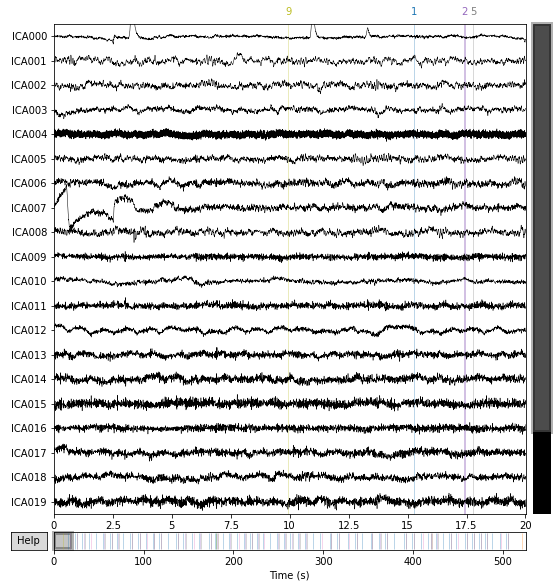

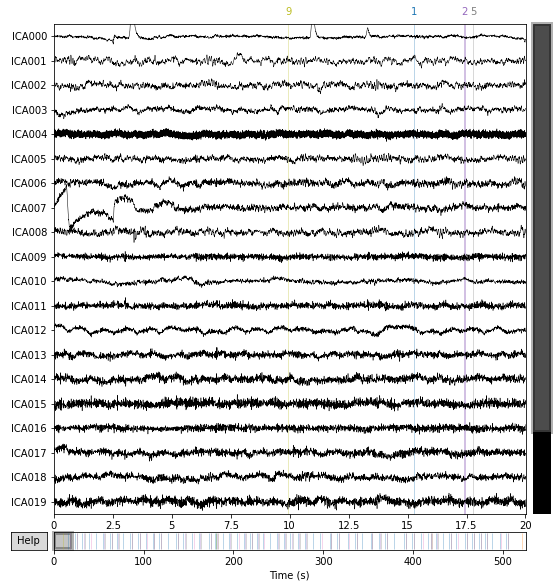

In [133]:
ica.plot_sources(raw)

In [134]:
ica.apply(raw, exclude = ica.exclude)

Applying ICA to Raw instance
    Transforming to ICA space (21 components)
    Zeroing out 0 ICA components
    Projecting back using 61 PCA components


<RawEEGLAB | sub-AB10_eeg_sub-AB10_task-gonogo_run-1_eeg.set, 66 x 262640 (525.3 s), ~132.3 MB, data loaded>

In [135]:
events = {}
events = mne.events_from_annotations(raw)

Used Annotations descriptions: ['1', '10', '11', '2', '3', '4', '5', '9']


In [136]:
events[1]

{'1': 1, '10': 2, '11': 3, '2': 4, '3': 5, '4': 6, '5': 7, '9': 8}

In [137]:
#Creating event id Dictionary
event_id = {
    "taskstart" : '9',
    "cue" : "1",
    "go" : "2",
    "button press" : "5",
    "no-go" : "4",
    "task end": "10",
    "error 1" : "3",
    "error 2" : "6",
    "error 3" : "7",
    "error 4" : "8",
    "error 5" : "11"
}
event_id

{'button press': '5',
 'cue': '1',
 'error 1': '3',
 'error 2': '6',
 'error 3': '7',
 'error 4': '8',
 'error 5': '11',
 'go': '2',
 'no-go': '4',
 'task end': '10',
 'taskstart': '9'}

In [138]:
#Creating epochs
epochs = {}
epochs = mne.Epochs(raw,
                   events = events[0],
                   event_id = events[1],)

Not setting metadata
Not setting metadata
155 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


Loading data for 155 events and 351 original time points ...
0 bad epochs dropped
Loading data for 155 events and 351 original time points ...
Loading data for 20 events and 351 original time points ...


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


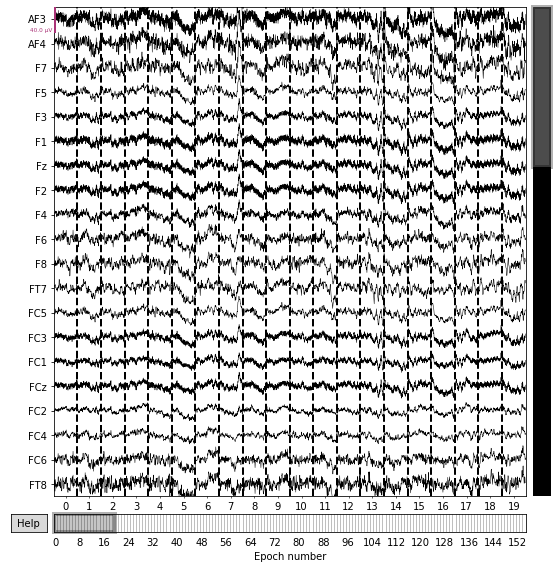

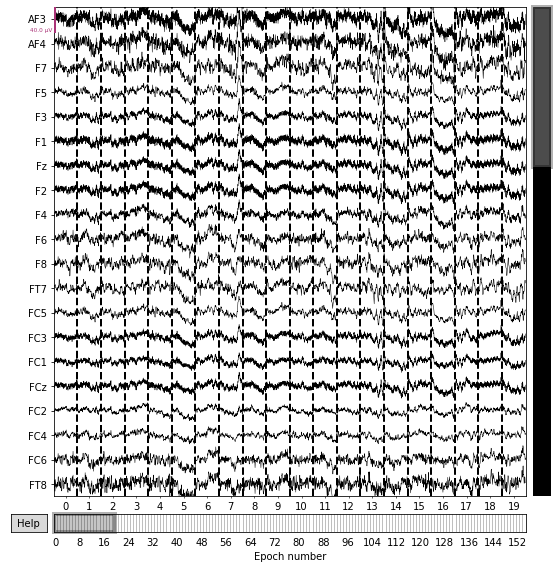

In [139]:
epochs.plot()

In [140]:
epochs.get_data(picks = 'eeg').shape

Loading data for 155 events and 351 original time points ...


(155, 61, 351)

In [141]:
#to fix event ids
def get_keys_from_value(d, val):
    return [k for k, v in d.items() if v == val]

def get_values_from_keys(d, val):
    return [v for k, v in d.items() if k == val]
def fix_event_ids(epochs, events):
  for i in range(epochs.events.shape[0]):
      epochs.events[i][2] = int(get_values_from_keys(events[1], epochs.events[i][2])[0])

In [142]:
# #fix event ids
# fix_event_ids(epochs, events)

In [143]:
epochs

Number of events,155
Events,1: 6010: 111: 12: 403: 24: 105: 409: 1
Time range,-0.200 – 0.500 sec
Baseline,-0.200 – 0.000 sec


Loading data for 60 events and 351 original time points ...
Not setting metadata
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "gfp"


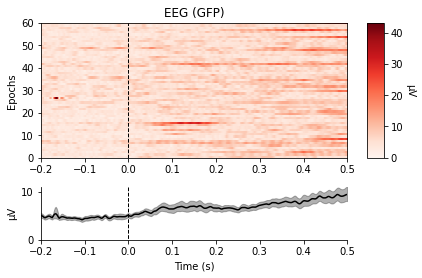

[<Figure size 432x288 with 3 Axes>]

In [144]:
epochs['1'].plot_image()

In [145]:
epochs['1']

Number of events,60
Events,1: 60
Time range,-0.200 – 0.500 sec
Baseline,-0.200 – 0.000 sec


In [146]:
evoked_101_cue = epochs['1'].average()
evoked_101_go = epochs['2'].average()
evoked_101_nogo = epochs['4'].average()

In [147]:
epochs

Number of events,155
Events,1: 6010: 111: 12: 403: 24: 105: 409: 1
Time range,-0.200 – 0.500 sec
Baseline,-0.200 – 0.000 sec


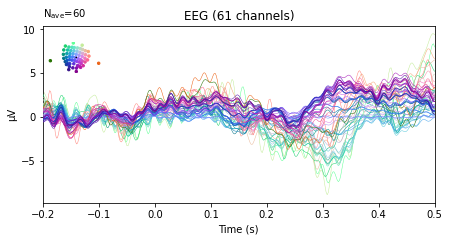

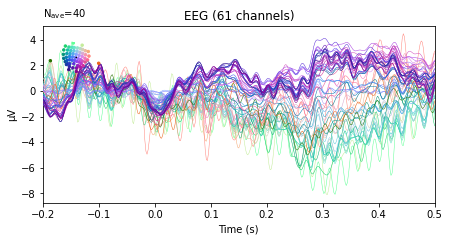

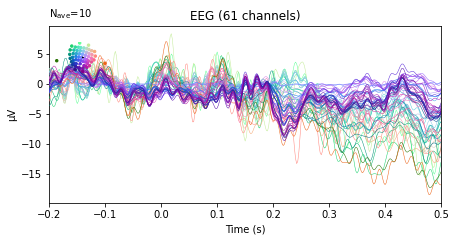

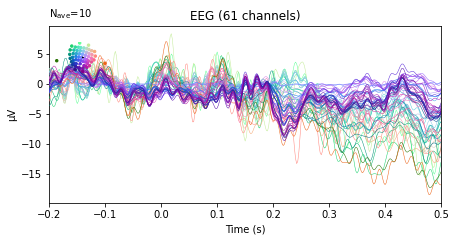

In [148]:
evoked_101_cue.plot(spatial_colors=True)
evoked_101_go.plot(spatial_colors=True)
evoked_101_nogo.plot(spatial_colors=True)

In [149]:
#%matplotlib qt
import pathlib
import matplotlib
import matplotlib.pyplot as plt
import mne
# matplotlib.use('Qt5Agg')
# mne.set_log_level('warning')

In [150]:
evoked_CUE=evoked_101_cue
evoked_GO=evoked_101_go
evoked_NOGO=evoked_101_nogo


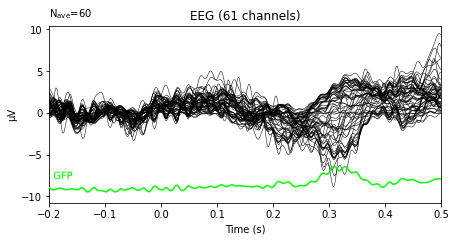

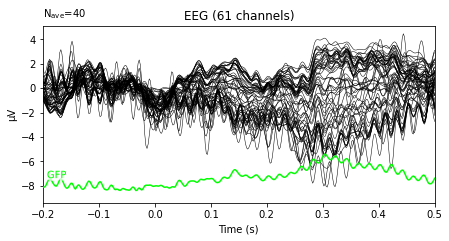

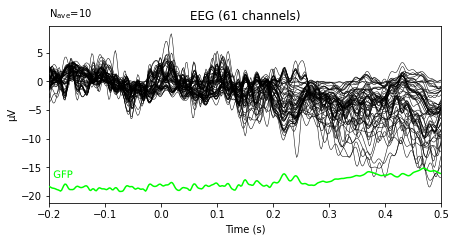

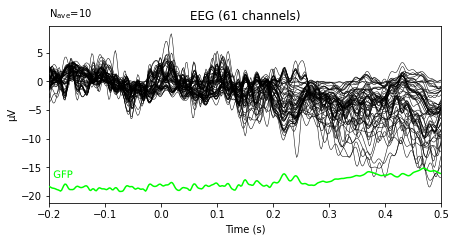

In [151]:
evoked_CUE.plot(gfp = True)
evoked_GO.plot(gfp = True)
evoked_NOGO.plot(gfp = True)

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


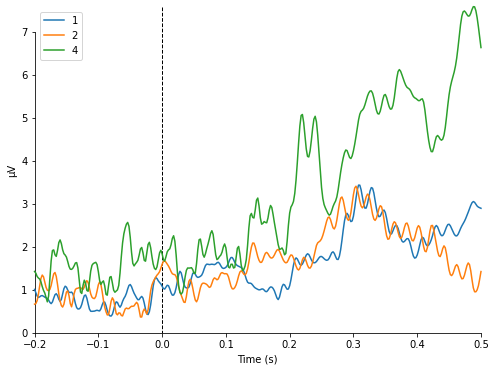

[<Figure size 576x432 with 1 Axes>]

In [152]:
mne.viz.plot_compare_evokeds(
    [
        evoked_CUE,
        evoked_GO,
        evoked_NOGO
    ],
    legend=True
)

In [153]:
diff_evoked_CUEGO = mne.combine_evoked([evoked_CUE, evoked_GO], weights=[1, -1])
diff_evoked_CUENOGO = mne.combine_evoked([evoked_CUE, evoked_NOGO], weights=[1, -1])
diff_evoked_GONOGO = mne.combine_evoked([evoked_GO, evoked_NOGO], weights=[1, -1])

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


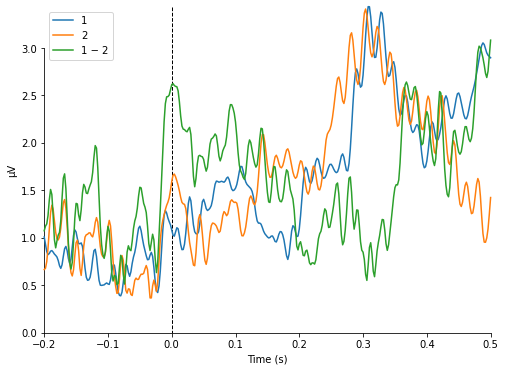

[<Figure size 576x432 with 1 Axes>]

In [154]:
mne.viz.plot_compare_evokeds(
    [
        evoked_CUE,
        evoked_GO,
        diff_evoked_CUEGO
    ],
    legend=True
)

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


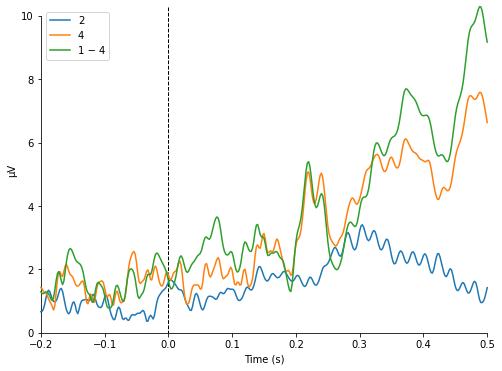

[<Figure size 576x432 with 1 Axes>]

In [155]:
mne.viz.plot_compare_evokeds(
    [
        evoked_GO,
        evoked_NOGO,
        diff_evoked_CUENOGO
    ],
    legend=True
)

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


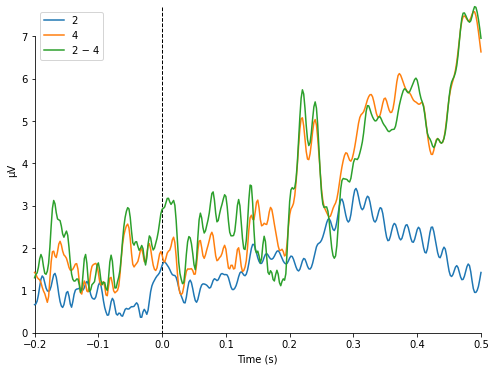

[<Figure size 576x432 with 1 Axes>]

In [156]:
mne.viz.plot_compare_evokeds(
    [
        evoked_GO,
        evoked_NOGO,
        diff_evoked_GONOGO
    ],
    legend=True
)

In [157]:
epochs.apply_proj()

No projector specified for this dataset. Please consider the method self.add_proj.


Number of events,155
Events,1: 6010: 111: 12: 403: 24: 105: 409: 1
Time range,-0.200 – 0.500 sec
Baseline,-0.200 – 0.000 sec


In [158]:
epochs.info

<Info | 8 non-empty values
 bads: []
 ch_names: AF3, AF4, F7, F5, F3, F1, Fz, F2, F4, F6, F8, FT7, FC5, FC3, ...
 chs: 61 EEG, 2 EOG, 1 ECG, 2 misc
 custom_ref_applied: False
 dig: 65 items (65 EEG)
 highpass: 0.5 Hz
 lowpass: 50.0 Hz
 meas_date: unspecified
 nchan: 66
 projs: []
 sfreq: 500.0 Hz
>

In [159]:
import atexit
from abc import ABCMeta

import numpy as np
import tensorflow as tf
from sklearn.base import ClassifierMixin, RegressorMixin

In [160]:


# from tensorflow.keras.models import AbstractSupervisedDBN as BaseAbstractSupervisedDBN
# from ..models import BaseModel
# from ..models import BinaryRBM as BaseBinaryRBM
# from ..models import UnsupervisedDBN as BaseUnsupervisedDBN
# from ..utils import batch_generator, to_categorical

In [161]:
# from dbn.tensorflow import SupervisedDBNClassification
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.metrics.classification import accuracy_score

In [162]:








# from abc import ABCMeta, abstractmethod

# import numpy as np
# from scipy.stats import truncnorm
# from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin, RegressorMixin

# from .activations import SigmoidActivationFunction, ReLUActivationFunction
# from .utils import batch_generator

In [163]:
from sklearn.neural_network import BernoulliRBM
import numpy as np
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

digits = datasets.load_digits()
X = np.asarray(digits.data, 'float32')
Y = digits.target
X = (X - np.min(X, 0)) / (np.max(X, 0) + 0.0001)  # 0-1 scaling

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=0)
print(Y_train.shape)

# logistic = linear_model.LogisticRegression(C=100)
# rbm1 = BernoulliRBM(n_components=100, learning_rate=0.06, n_iter=100, verbose=1, random_state=101)
# rbm2 = BernoulliRBM(n_components=80, learning_rate=0.06, n_iter=100, verbose=1, random_state=101)
# rbm3 = BernoulliRBM(n_components=60, learning_rate=0.06, n_iter=100, verbose=1, random_state=101)
# DBN3 = Pipeline(steps=[('rbm1', rbm1),('rbm2', rbm2), ('rbm3', rbm3), ('logistic', logistic)])

# DBN3.fit(X_train, Y_train)

# print("Logistic regression using RBM features:\n%s\n" % (
#     metrics.classification_report(
#         Y_test,
#         DBN3.predict(X_test))))

(1437,)


In [164]:
data = epochs.get_data(picks = 'eeg')
data.shape

Loading data for 155 events and 351 original time points ...


(155, 61, 351)

In [165]:
#Changing the shape of data from (events, channel, time points) to (events, time points, channel)
datars = np.zeros((data.shape[0], data.shape[2], data.shape[1]))
for i in range(datars.shape[0]):
    datars[i] = np.transpose(data[i])
    
dims_lstm_1 = datars.shape[1]
dims_lstm_2 = datars.shape[2]
print(dims_lstm_1, "X", dims_lstm_2)
datars.shape

351 X 61


(155, 351, 61)

In [166]:
n_trials = data.shape[0]


data = data.reshape(n_trials, -1)
print(data.shape)
dims_ip = data.shape[1]
dims_ip

(155, 21411)


21411

In [167]:
y = epochs.events[:, 2]
y.shape

(155,)

In [168]:
#Preparing main dataset
y1=y.copy()
print(y1.shape)
y = y.reshape(-1, 1)
# y = y[...,np.newaxis]
datarscopy = datars.copy()
datarscopy = datarscopy.reshape(datars.shape[0], -1)

print(datars.shape)
print(y.shape)
main_dataset = np.concatenate((datarscopy, y), axis = 1)
print(main_dataset.shape)

#Defining main x and y for training
main_x = main_dataset[:, :-1]
main_y = main_dataset[:, -1]
print(main_x.shape)
print(main_y.shape)

(155,)
(155, 351, 61)
(155, 1)
(155, 21412)
(155, 21411)
(155,)


In [169]:
# Clearing memory
del unclean_raw
del raw
del ica
del events
del epochs

In [170]:
#Removing events which are not needed for current task
dataset = main_dataset.copy()
print(dataset.shape)
dataset = dataset[dataset[:, -1]!=9]
dataset = dataset[dataset[:, -1]!=10]

dataset = dataset[dataset[:, -1]!=3]
dataset = dataset[dataset[:, -1]!=6]
dataset = dataset[dataset[:, -1]!=7]
dataset = dataset[dataset[:, -1]!=8]
dataset = dataset[dataset[:, -1]!=11]

print(dataset.shape)

(155, 21412)
(103, 21412)


In [171]:
#Defining x and y
x = dataset[:, :-1]
y = dataset[:, -1]
print(x.shape)
print(y.shape)
print(list(set(y)))

permutations = np.random.permutation(len(x))

(103, 21411)
(103,)
[1.0, 2.0, 4.0, 5.0]


In [172]:
print(x[-1])
x = x[permutations]
y = y[permutations]
print(x[-1])

xmlp = x.copy()
ymlp = y.copy()

xlstm = x.copy().reshape((-1, dims_lstm_1, dims_lstm_2))
ylstm = y.copy()

xcnn = x.copy().reshape((-1, dims_lstm_1, dims_lstm_2))
ycnn = y.copy()

[-4.54741314e-06  4.90216352e-06 -1.16320720e-06 ... -2.74442286e-05
 -1.25191653e-05 -1.38858588e-05]
[-4.78390291e-06 -4.36486190e-06  6.43981383e-06 ...  3.49710397e-07
  4.89754949e-06  5.22995524e-06]


In [173]:
#Encoding y
# dict = {1.0: 0,2.0: 1, 4.0: 2, 5.0: 3}

# for i in range(len(y)):
#     y[i] = dict[y[i]]
#     ylstm[i] = dict[ylstm[i]]

# print(list(set(y)))

In [174]:
# num_classes = 4
# y = tf.keras.utils.to_categorical(y, num_classes)
# ymlp = y.copy()
# ylstm = y.copy()
# ycnn = y.copy()
# # yab10_1[0]
# print(y[:5])

In [175]:
train_test_split = int(0.8 * len(xmlp))
print(train_test_split)

x_train_mlp = xmlp[:train_test_split]
y_train_mlp = ymlp[:train_test_split]

x_test_mlp = xmlp[train_test_split:]
y_test_mlp = ymlp[train_test_split:]
y_test_mlp

82


array([1., 1., 4., 4., 1., 1., 4., 1., 1., 1., 1., 4., 1., 1., 4., 5., 4.,
       4., 1., 4., 1.])

In [176]:
from sklearn.neural_network import BernoulliRBM
import numpy as np
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# digits = datasets.load_digits()
# X = np.asarray(digits.data, 'float32')
# Y = digits.target
# X = (X - np.min(X, 0)) / (np.max(X, 0) + 0.0001)  # 0-1 scaling

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
#                                                     test_size=0.2,
#                                                     random_state=0)
X_train=x_train_mlp
Y_train=y_train_mlp

X_test=x_test_mlp
Y_test=y_test_mlp
# print(Y_train.shape)
print(y_train_mlp.shape)


logistic = linear_model.LogisticRegression(C=100)
rbm1 = BernoulliRBM(n_components=100, learning_rate=0.06, n_iter=100, verbose=1, random_state=101)
rbm2 = BernoulliRBM(n_components=80, learning_rate=0.06, n_iter=100, verbose=1, random_state=101)
rbm3 = BernoulliRBM(n_components=60, learning_rate=0.06, n_iter=100, verbose=1, random_state=101)
DBN3 = Pipeline(steps=[('rbm1', rbm1),('rbm2', rbm2), ('rbm3', rbm3), ('logistic', logistic)])

DBN3.fit(X_train, Y_train)

print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        DBN3.predict(X_test))))

(82,)
[BernoulliRBM] Iteration 1, pseudo-likelihood = -6074.06, time = 0.55s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -4250.27, time = 0.53s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -3069.44, time = 0.54s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -2307.59, time = 0.52s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -1788.82, time = 0.55s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -1448.32, time = 0.64s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -1212.03, time = 0.60s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -1054.34, time = 0.54s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -926.28, time = 0.56s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -827.32, time = 0.54s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -752.91, time = 0.53s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -685.58, time = 0.52s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -633.05, time = 0.56s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -588.01, time = 0.52s
[

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [178]:
from abc import ABCMeta, abstractmethod

import numpy as np
from scipy.stats import truncnorm
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin, RegressorMixin

In [179]:
#activations


class ActivationFunction(object):
    """
    Class for abstract activation function.
    """
    __metaclass__ = ABCMeta

    @abstractmethod
    def function(self, x):
        return

    @abstractmethod
    def prime(self, x):
        return


class SigmoidActivationFunction(ActivationFunction):
    @classmethod
    def function(cls, x):
        """
        Sigmoid function.
        :param x: array-like, shape = (n_features, )
        :return:
        """
        return 1 / (1.0 + np.exp(-x))

    @classmethod
    def prime(cls, x):
        """
        Compute sigmoid first derivative.
        :param x: array-like, shape = (n_features, )
        :return:
        """
        return x * (1 - x)


class ReLUActivationFunction(ActivationFunction):
    @classmethod
    def function(cls, x):
        """
        Rectified linear function.
        :param x: array-like, shape = (n_features, )
        :return:
        """
        return np.maximum(np.zeros(x.shape), x)

    @classmethod
    def prime(cls, x):
        """
        Rectified linear first derivative.
        :param x: array-like, shape = (n_features, )
        :return:
        """
        return (x > 0).astype(int)


class TanhActivationFunction(ActivationFunction):
    @classmethod
    def function(cls, x):
        """
        Hyperbolic tangent function.
        :param x: array-like, shape = (n_features, )
        :return:
        """
        return np.tanh(x)

    @classmethod
    def prime(cls, x):
        """
        Hyperbolic tangent first derivative.
        :param x: array-like, shape = (n_features, )
        :return:
        """
        return 1 - x * x

In [180]:
# batch_generator
def batch_generator(batch_size, data, labels=None):
    """
    Generates batches of samples
    :param data: array-like, shape = (n_samples, n_features)
    :param labels: array-like, shape = (n_samples, )
    :return:
    """
    n_batches = int(np.ceil(len(data) / float(batch_size)))
    idx = np.random.permutation(len(data))
    data_shuffled = data[idx]
    if labels is not None:
        labels_shuffled = labels[idx]
    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size
        if labels is not None:
            yield data_shuffled[start:end, :], labels_shuffled[start:end]
        else:
            yield data_shuffled[start:end, :]

In [191]:
class BinaryRBM(BaseEstimator, TransformerMixin, BaseModel):
    """
    This class implements a Binary Restricted Boltzmann machine.
    """

    def __init__(self,
                 n_hidden_units=100,
                 activation_function='sigmoid',
                 optimization_algorithm='sgd',
                 learning_rate=1e-3,
                 n_epochs=10,
                 contrastive_divergence_iter=1,
                 batch_size=32,
                 verbose=True):
        self.n_hidden_units = n_hidden_units
        self.activation_function = activation_function
        self.optimization_algorithm = optimization_algorithm
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.contrastive_divergence_iter = contrastive_divergence_iter
        self.batch_size = batch_size
        self.verbose = verbose

    def fit(self, X):
        """
        Fit a model given data.
        :param X: array-like, shape = (n_samples, n_features)
        :return:
        """
        # Initialize RBM parameters
        self.n_visible_units = X.shape[1]
        if self.activation_function == 'sigmoid':
            self.W = np.random.randn(self.n_hidden_units, self.n_visible_units) / np.sqrt(self.n_visible_units)
            self.c = np.random.randn(self.n_hidden_units) / np.sqrt(self.n_visible_units)
            self.b = np.random.randn(self.n_visible_units) / np.sqrt(self.n_visible_units)
            self._activation_function_class = SigmoidActivationFunction
        elif self.activation_function == 'relu':
            self.W = truncnorm.rvs(-0.2, 0.2, size=[self.n_hidden_units, self.n_visible_units]) / np.sqrt(
                self.n_visible_units)
            self.c = np.full(self.n_hidden_units, 0.1) / np.sqrt(self.n_visible_units)
            self.b = np.full(self.n_visible_units, 0.1) / np.sqrt(self.n_visible_units)
            self._activation_function_class = ReLUActivationFunction
        else:
            raise ValueError("Invalid activation function.")

        if self.optimization_algorithm == 'sgd':
            self._stochastic_gradient_descent(X)
        else:
            raise ValueError("Invalid optimization algorithm.")
        return self

    def transform(self, X):
        """
        Transforms data using the fitted model.
        :param X: array-like, shape = (n_samples, n_features)
        :return:
        """
        if len(X.shape) == 1:  # It is a single sample
            return self._compute_hidden_units(X)
        transformed_data = self._compute_hidden_units_matrix(X)
        return transformed_data

    def _reconstruct(self, transformed_data):
        """
        Reconstruct visible units given the hidden layer output.
        :param transformed_data: array-like, shape = (n_samples, n_features)
        :return:
        """
        return self._compute_visible_units_matrix(transformed_data)

    def _stochastic_gradient_descent(self, _data):
        """
        Performs stochastic gradient descend optimization algorithm.
        :param _data: array-like, shape = (n_samples, n_features)
        :return:
        """
        accum_delta_W = np.zeros(self.W.shape)
        accum_delta_b = np.zeros(self.b.shape)
        accum_delta_c = np.zeros(self.c.shape)
        for iteration in range(1, self.n_epochs + 1):
            idx = np.random.permutation(len(_data))
            data = _data[idx]
            for batch in batch_generator(self.batch_size, data):
                accum_delta_W[:] = .0
                accum_delta_b[:] = .0
                accum_delta_c[:] = .0
                for sample in batch:
                    delta_W, delta_b, delta_c = self._contrastive_divergence(sample)
                    accum_delta_W += delta_W
                    accum_delta_b += delta_b
                    accum_delta_c += delta_c
                self.W += self.learning_rate * (accum_delta_W / self.batch_size)
                self.b += self.learning_rate * (accum_delta_b / self.batch_size)
                self.c += self.learning_rate * (accum_delta_c / self.batch_size)
            if self.verbose:
                error = self._compute_reconstruction_error(data)
                print(">> Epoch %d finished \tRBM Reconstruction error %f" % (iteration, error))

    def _contrastive_divergence(self, vector_visible_units):
        """
        Computes gradients using Contrastive Divergence method.
        :param vector_visible_units: array-like, shape = (n_features, )
        :return:
        """
        v_0 = vector_visible_units
        v_t = np.array(v_0)

        # Sampling
        for t in range(self.contrastive_divergence_iter):
            h_t = self._sample_hidden_units(v_t)
            v_t = self._compute_visible_units(h_t)

        # Computing deltas
        v_k = v_t
        h_0 = self._compute_hidden_units(v_0)
        h_k = self._compute_hidden_units(v_k)
        delta_W = np.outer(h_0, v_0) - np.outer(h_k, v_k)
        delta_b = v_0 - v_k
        delta_c = h_0 - h_k

        return delta_W, delta_b, delta_c

    def _sample_hidden_units(self, vector_visible_units):
        """
        Computes hidden unit activations by sampling from a binomial distribution.
        :param vector_visible_units: array-like, shape = (n_features, )
        :return:
        """
        hidden_units = self._compute_hidden_units(vector_visible_units)
        return (np.random.random_sample(len(hidden_units)) < hidden_units).astype(np.int64)

    def _sample_visible_units(self, vector_hidden_units):
        """
        Computes visible unit activations by sampling from a binomial distribution.
        :param vector_hidden_units: array-like, shape = (n_features, )
        :return:
        """
        visible_units = self._compute_visible_units(vector_hidden_units)
        return (np.random.random_sample(len(visible_units)) < visible_units).astype(np.int64)

    def _compute_hidden_units(self, vector_visible_units):
        """
        Computes hidden unit outputs.
        :param vector_visible_units: array-like, shape = (n_features, )
        :return:
        """
        v = np.expand_dims(vector_visible_units, 0)
        h = np.squeeze(self._compute_hidden_units_matrix(v))
        return np.array([h]) if not h.shape else h

    def _compute_hidden_units_matrix(self, matrix_visible_units):
        """
        Computes hidden unit outputs.
        :param matrix_visible_units: array-like, shape = (n_samples, n_features)
        :return:
        """
        return np.transpose(self._activation_function_class.function(
            np.dot(self.W, np.transpose(matrix_visible_units)) + self.c[:, np.newaxis]))

    def _compute_visible_units(self, vector_hidden_units):
        """
        Computes visible (or input) unit outputs.
        :param vector_hidden_units: array-like, shape = (n_features, )
        :return:
        """
        h = np.expand_dims(vector_hidden_units, 0)
        v = np.squeeze(self._compute_visible_units_matrix(h))
        return np.array([v]) if not v.shape else v

    def _compute_visible_units_matrix(self, matrix_hidden_units):
        """
        Computes visible (or input) unit outputs.
        :param matrix_hidden_units: array-like, shape = (n_samples, n_features)
        :return:
        """
        return self._activation_function_class.function(np.dot(matrix_hidden_units, self.W) + self.b[np.newaxis, :])

    def _compute_free_energy(self, vector_visible_units):
        """
        Computes the RBM free energy.
        :param vector_visible_units: array-like, shape = (n_features, )
        :return:
        """
        v = vector_visible_units
        return - np.dot(self.b, v) - np.sum(np.log(1 + np.exp(np.dot(self.W, v) + self.c)))

    def _compute_reconstruction_error(self, data):
        """
        Computes the reconstruction error of the data.
        :param data: array-like, shape = (n_samples, n_features)
        :return:
        """
        data_transformed = self.transform(data)
        data_reconstructed = self._reconstruct(data_transformed)
        return np.mean(np.sum((data_reconstructed - data) ** 2, 1))

In [181]:
class BaseModel(object):
    def save(self, save_path):
        import pickle

        with open(save_path, 'wb') as fp:
            pickle.dump(self, fp)

    @classmethod
    def load(cls, load_path):
        import pickle

        with open(load_path, 'rb') as fp:
            return pickle.load(fp)

In [189]:
class UnsupervisedDBN(BaseEstimator, TransformerMixin, BaseModel):
    """
    This class implements a unsupervised Deep Belief Network.
    """

    def __init__(self,
                 hidden_layers_structure=[100, 100],
                 activation_function='sigmoid',
                 optimization_algorithm='sgd',
                 learning_rate_rbm=1e-3,
                 n_epochs_rbm=10,
                 contrastive_divergence_iter=1,
                 batch_size=32,
                 verbose=True):
        self.hidden_layers_structure = hidden_layers_structure
        self.activation_function = activation_function
        self.optimization_algorithm = optimization_algorithm
        self.learning_rate_rbm = learning_rate_rbm
        self.n_epochs_rbm = n_epochs_rbm
        self.contrastive_divergence_iter = contrastive_divergence_iter
        self.batch_size = batch_size
        self.rbm_layers = None
        self.verbose = verbose
        self.rbm_class = BinaryRBM

    def fit(self, X, y=None):
        """
        Fits a model given data.
        :param X: array-like, shape = (n_samples, n_features)
        :return:
        """
        # Initialize rbm layers
        self.rbm_layers = list()
        for n_hidden_units in self.hidden_layers_structure:
            rbm = self.rbm_class(n_hidden_units=n_hidden_units,
                                 activation_function=self.activation_function,
                                 optimization_algorithm=self.optimization_algorithm,
                                 learning_rate=self.learning_rate_rbm,
                                 n_epochs=self.n_epochs_rbm,
                                 contrastive_divergence_iter=self.contrastive_divergence_iter,
                                 batch_size=self.batch_size,
                                 verbose=self.verbose)
            self.rbm_layers.append(rbm)

        # Fit RBM
        if self.verbose:
            print("[START] Pre-training step:")
        input_data = X
        for rbm in self.rbm_layers:
            rbm.fit(input_data)
            input_data = rbm.transform(input_data)
        if self.verbose:
            print("[END] Pre-training step")
        return self

    def transform(self, X):
        """
        Transforms data using the fitted model.
        :param X: array-like, shape = (n_samples, n_features)
        :return:
        """
        input_data = X
        for rbm in self.rbm_layers:
            input_data = rbm.transform(input_data)
        return input_data


In [184]:
class AbstractSupervisedDBN(BaseEstimator, BaseModel):
    """
    Abstract class for supervised Deep Belief Network.
    """
    __metaclass__ = ABCMeta

    def __init__(self,
                 unsupervised_dbn_class,
                 hidden_layers_structure=[100, 100],
                 activation_function='sigmoid',
                 optimization_algorithm='sgd',
                 learning_rate=1e-3,
                 learning_rate_rbm=1e-3,
                 n_iter_backprop=100,
                 l2_regularization=1.0,
                 n_epochs_rbm=10,
                 contrastive_divergence_iter=1,
                 batch_size=32,
                 dropout_p=0,  # float between 0 and 1. Fraction of the input units to drop
                 verbose=True):
        self.unsupervised_dbn = unsupervised_dbn_class(hidden_layers_structure=hidden_layers_structure,
                                                       activation_function=activation_function,
                                                       optimization_algorithm=optimization_algorithm,
                                                       learning_rate_rbm=learning_rate_rbm,
                                                       n_epochs_rbm=n_epochs_rbm,
                                                       contrastive_divergence_iter=contrastive_divergence_iter,
                                                       batch_size=batch_size,
                                                       verbose=verbose)
        self.unsupervised_dbn_class = unsupervised_dbn_class
        self.n_iter_backprop = n_iter_backprop
        self.l2_regularization = l2_regularization
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.dropout_p = dropout_p
        self.p = 1 - self.dropout_p
        self.verbose = verbose

    def fit(self, X, y=None, pre_train=True):
        """
        Fits a model given data.
        :param X: array-like, shape = (n_samples, n_features)
        :param y : array-like, shape = (n_samples, )
        :param pre_train: bool
        :return:
        """
        if pre_train:
            self.pre_train(X)
        self._fine_tuning(X, y)
        return self

    def predict(self, X):
        """
        Predicts the target given data.
        :param X: array-like, shape = (n_samples, n_features)
        :return:
        """
        if len(X.shape) == 1:  # It is a single sample
            X = np.expand_dims(X, 0)
        transformed_data = self.transform(X)
        predicted_data = self._compute_output_units_matrix(transformed_data)
        return predicted_data

    def pre_train(self, X):
        """
        Apply unsupervised network pre-training.
        :param X: array-like, shape = (n_samples, n_features)
        :return:
        """
        self.unsupervised_dbn.fit(X)
        return self

    def transform(self, *args):
        return self.unsupervised_dbn.transform(*args)

    @abstractmethod
    def _transform_labels_to_network_format(self, labels):
        return

    @abstractmethod
    def _compute_output_units_matrix(self, matrix_visible_units):
        return

    @abstractmethod
    def _determine_num_output_neurons(self, labels):
        return

    @abstractmethod
    def _stochastic_gradient_descent(self, data, labels):
        return

    @abstractmethod
    def _fine_tuning(self, data, _labels):
        return

In [185]:
class NumPyAbstractSupervisedDBN(AbstractSupervisedDBN):
    """
    Abstract class for supervised Deep Belief Network in NumPy
    """
    __metaclass__ = ABCMeta

    def __init__(self, **kwargs):
        super(NumPyAbstractSupervisedDBN, self).__init__(UnsupervisedDBN, **kwargs)

    def _compute_activations(self, sample):
        """
        Compute output values of all layers.
        :param sample: array-like, shape = (n_features, )
        :return:
        """
        input_data = sample
        if self.dropout_p > 0:
            r = np.random.binomial(1, self.p, len(input_data))
            input_data *= r
        layers_activation = list()

        for rbm in self.unsupervised_dbn.rbm_layers:
            input_data = rbm.transform(input_data)
            if self.dropout_p > 0:
                r = np.random.binomial(1, self.p, len(input_data))
                input_data *= r
            layers_activation.append(input_data)

        # Computing activation of output layer
        input_data = self._compute_output_units(input_data)
        layers_activation.append(input_data)

        return layers_activation

    def _stochastic_gradient_descent(self, _data, _labels):
        """
        Performs stochastic gradient descend optimization algorithm.
        :param _data: array-like, shape = (n_samples, n_features)
        :param _labels: array-like, shape = (n_samples, targets)
        :return:
        """
        if self.verbose:
            matrix_error = np.zeros([len(_data), self.num_classes])
        num_samples = len(_data)
        accum_delta_W = [np.zeros(rbm.W.shape) for rbm in self.unsupervised_dbn.rbm_layers]
        accum_delta_W.append(np.zeros(self.W.shape))
        accum_delta_bias = [np.zeros(rbm.c.shape) for rbm in self.unsupervised_dbn.rbm_layers]
        accum_delta_bias.append(np.zeros(self.b.shape))

        for iteration in range(1, self.n_iter_backprop + 1):
            idx = np.random.permutation(len(_data))
            data = _data[idx]
            labels = _labels[idx]
            i = 0
            for batch_data, batch_labels in batch_generator(self.batch_size, data, labels):
                # Clear arrays
                for arr1, arr2 in zip(accum_delta_W, accum_delta_bias):
                    arr1[:], arr2[:] = .0, .0
                for sample, label in zip(batch_data, batch_labels):
                    delta_W, delta_bias, predicted = self._backpropagation(sample, label)
                    for layer in range(len(self.unsupervised_dbn.rbm_layers) + 1):
                        accum_delta_W[layer] += delta_W[layer]
                        accum_delta_bias[layer] += delta_bias[layer]
                    if self.verbose:
                        loss = self._compute_loss(predicted, label)
                        matrix_error[i, :] = loss
                        i += 1

                layer = 0
                for rbm in self.unsupervised_dbn.rbm_layers:
                    # Updating parameters of hidden layers
                    rbm.W = (1 - (
                        self.learning_rate * self.l2_regularization) / num_samples) * rbm.W - self.learning_rate * (
                        accum_delta_W[layer] / self.batch_size)
                    rbm.c -= self.learning_rate * (accum_delta_bias[layer] / self.batch_size)
                    layer += 1
                # Updating parameters of output layer
                self.W = (1 - (
                    self.learning_rate * self.l2_regularization) / num_samples) * self.W - self.learning_rate * (
                    accum_delta_W[layer] / self.batch_size)
                self.b -= self.learning_rate * (accum_delta_bias[layer] / self.batch_size)

            if self.verbose:
                error = np.mean(np.sum(matrix_error, 1))
                print(">> Epoch %d finished \tANN training loss %f" % (iteration, error))

    def _backpropagation(self, input_vector, label):
        """
        Performs Backpropagation algorithm for computing gradients.
        :param input_vector: array-like, shape = (n_features, )
        :param label: array-like, shape = (n_targets, )
        :return:
        """
        x, y = input_vector, label
        deltas = list()
        list_layer_weights = list()
        for rbm in self.unsupervised_dbn.rbm_layers:
            list_layer_weights.append(rbm.W)
        list_layer_weights.append(self.W)

        # Forward pass
        layers_activation = self._compute_activations(input_vector)

        # Backward pass: computing deltas
        activation_output_layer = layers_activation[-1]
        delta_output_layer = self._compute_output_layer_delta(y, activation_output_layer)
        deltas.append(delta_output_layer)
        layer_idx = list(range(len(self.unsupervised_dbn.rbm_layers)))
        layer_idx.reverse()
        delta_previous_layer = delta_output_layer
        for layer in layer_idx:
            neuron_activations = layers_activation[layer]
            W = list_layer_weights[layer + 1]
            delta = np.dot(delta_previous_layer, W) * self.unsupervised_dbn.rbm_layers[
                layer]._activation_function_class.prime(neuron_activations)
            deltas.append(delta)
            delta_previous_layer = delta
        deltas.reverse()

        # Computing gradients
        layers_activation.pop()
        layers_activation.insert(0, input_vector)
        layer_gradient_weights, layer_gradient_bias = list(), list()
        for layer in range(len(list_layer_weights)):
            neuron_activations = layers_activation[layer]
            delta = deltas[layer]
            gradient_W = np.outer(delta, neuron_activations)
            layer_gradient_weights.append(gradient_W)
            layer_gradient_bias.append(delta)

        return layer_gradient_weights, layer_gradient_bias, activation_output_layer

    def _fine_tuning(self, data, _labels):
        """
        Entry point of the fine tuning procedure.
        :param data: array-like, shape = (n_samples, n_features)
        :param _labels: array-like, shape = (n_samples, targets)
        :return:
        """
        self.num_classes = self._determine_num_output_neurons(_labels)
        n_hidden_units_previous_layer = self.unsupervised_dbn.rbm_layers[-1].n_hidden_units
        self.W = np.random.randn(self.num_classes, n_hidden_units_previous_layer) / np.sqrt(
            n_hidden_units_previous_layer)
        self.b = np.random.randn(self.num_classes) / np.sqrt(n_hidden_units_previous_layer)

        labels = self._transform_labels_to_network_format(_labels)

        # Scaling up weights obtained from pretraining
        for rbm in self.unsupervised_dbn.rbm_layers:
            rbm.W /= self.p
            rbm.c /= self.p

        if self.verbose:
            print("[START] Fine tuning step:")

        if self.unsupervised_dbn.optimization_algorithm == 'sgd':
            self._stochastic_gradient_descent(data, labels)
        else:
            raise ValueError("Invalid optimization algorithm.")

        # Scaling down weights obtained from pretraining
        for rbm in self.unsupervised_dbn.rbm_layers:
            rbm.W *= self.p
            rbm.c *= self.p

        if self.verbose:
            print("[END] Fine tuning step")

    @abstractmethod
    def _compute_loss(self, predicted, label):
        return

    @abstractmethod
    def _compute_output_layer_delta(self, label, predicted):
        return

In [186]:
class SupervisedDBNClassification(NumPyAbstractSupervisedDBN, ClassifierMixin):
    """
    This class implements a Deep Belief Network for classification problems.
    It appends a Softmax Linear Classifier as output layer.
    """

    def _transform_labels_to_network_format(self, labels):
        """
        Converts labels as single integer to row vectors. For instance, given a three class problem, labels would be
        mapped as label_1: [1 0 0], label_2: [0 1 0], label_3: [0, 0, 1] where labels can be either int or string.
        :param labels: array-like, shape = (n_samples, )
        :return:
        """
        new_labels = np.zeros([len(labels), self.num_classes])
        self.label_to_idx_map, self.idx_to_label_map = dict(), dict()
        idx = 0
        for i, label in enumerate(labels):
            if label not in self.label_to_idx_map:
                self.label_to_idx_map[label] = idx
                self.idx_to_label_map[idx] = label
                idx += 1
            new_labels[i][self.label_to_idx_map[label]] = 1
        return new_labels

    def _transform_network_format_to_labels(self, indexes):
        """
        Converts network output to original labels.
        :param indexes: array-like, shape = (n_samples, )
        :return:
        """
        return list(map(lambda idx: self.idx_to_label_map[idx], indexes))

    def _compute_output_units(self, vector_visible_units):
        """
        Compute activations of output units.
        :param vector_visible_units: array-like, shape = (n_features, )
        :return:
        """
        v = vector_visible_units
        scores = np.dot(self.W, v) + self.b
        # get unnormalized probabilities
        exp_scores = np.exp(scores)
        # normalize them for each example
        return exp_scores / np.sum(exp_scores)

    def _compute_output_units_matrix(self, matrix_visible_units):
        """
        Compute activations of output units.
        :param matrix_visible_units: shape = (n_samples, n_features)
        :return:
        """
        matrix_scores = np.transpose(np.dot(self.W, np.transpose(matrix_visible_units)) + self.b[:, np.newaxis])
        exp_scores = np.exp(matrix_scores)
        return exp_scores / np.expand_dims(np.sum(exp_scores, axis=1), 1)

    def _compute_output_layer_delta(self, label, predicted):
        """
        Compute deltas of the output layer, using cross-entropy cost function.
        :param label: array-like, shape = (n_features, )
        :param predicted: array-like, shape = (n_features, )
        :return:
        """
        dscores = np.array(predicted)
        dscores[np.where(label == 1)] -= 1
        return dscores

    def predict_proba(self, X):
        """
        Predicts probability distribution of classes for each sample in the given data.
        :param X: array-like, shape = (n_samples, n_features)
        :return:
        """
        return super(SupervisedDBNClassification, self).predict(X)

    def predict_proba_dict(self, X):
        """
        Predicts probability distribution of classes for each sample in the given data.
        Returns a list of dictionaries, one per sample. Each dict contains {label_1: prob_1, ..., label_j: prob_j}
        :param X: array-like, shape = (n_samples, n_features)
        :return:
        """
        if len(X.shape) == 1:  # It is a single sample
            X = np.expand_dims(X, 0)

        predicted_probs = self.predict_proba(X)

        result = []
        num_of_data, num_of_labels = predicted_probs.shape
        for i in range(num_of_data):
            # key : label
            # value : predicted probability
            dict_prob = {}
            for j in range(num_of_labels):
                dict_prob[self.idx_to_label_map[j]] = predicted_probs[i][j]
            result.append(dict_prob)

        return result

    def predict(self, X):
        probs = self.predict_proba(X)
        indexes = np.argmax(probs, axis=1)
        return self._transform_network_format_to_labels(indexes)

    def _determine_num_output_neurons(self, labels):
        """
        Given labels, compute the needed number of output units.
        :param labels: shape = (n_samples, )
        :return:
        """
        return len(np.unique(labels))

    def _compute_loss(self, probs, label):
        """
        Computes categorical cross-entropy loss
        :param probs:
        :param label:
        :return:
        """
        return -np.log(probs[np.where(label == 1)])

In [187]:
import numpy as np

np.random.seed(1337)  # for reproducibility
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [192]:
classifier = SupervisedDBNClassification(hidden_layers_structure=[256, 256],
                                         learning_rate_rbm=0.05,
                                         learning_rate=0.1,
                                         n_epochs_rbm=10,
                                         n_iter_backprop=100,
                                         batch_size=32,
                                         activation_function='relu',
                                         dropout_p=0.2)

In [ ]:
classifier.fit(X_train, Y_train)

In [194]:
Y_pred = classifier.predict(X_test)
print('Done.\nAccuracy: %f' % accuracy_score(Y_test, Y_pred))

Done.
Accuracy: 0.571429


In [ ]:
# Loading dataset
digits = load_digits()
X, Y = digits.data, digits.target

# Data scaling
X = (X / 16).astype(np.float32)

# Splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
print(x_train.shape)
print(X_train.shape)

In [ ]:
print(y_train.shape)
print(Y_train.shape)